In [1]:
## Loading libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
from ncar_jobqueue import NCARCluster
from distributed import Client
cluster = NCARCluster(project="UCGD0006", processes=2, cores=4)
cluster.adapt(minimum_jobs=1, maximum_jobs=10)
client = Client(cluster)
cluster

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [3]:
import intake
var= ["ua"]
col = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
#cat=col.search(activity_id="CMIP", source_id="CESM2",experiment_id="1pctCO2", variable_id=var,
# table_id="Amon", grid_label="gn")
cat=col.search(activity_id="CMIP",experiment_id="historical", variable_id=var,
table_id="Amon", grid_label="gn", time_range="185001-201412")

In [4]:
cat.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
33144,CMIP,BCC,BCC-ESM1,historical,r2i1p1f1,Amon,ua,gn,NaN,v20181217,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33502,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,ua,gn,NaN,v20181217,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33861,CMIP,BCC,BCC-ESM1,historical,r3i1p1f1,Amon,ua,gn,NaN,v20181217,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
43528,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,ua,gn,NaN,v20190227,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2-...
45759,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,ua,gn,NaN,v20190227,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2-...


In [5]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {"time": 36}, 
                                    'decode_times': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 7 group(s)


In [6]:
dset_dict.keys()

dict_keys(['CMIP.BCC.BCC-ESM1.historical.Amon.gn', 'CMIP.CCCma.CanESM5.historical.Amon.gn', 'CMIP.MIROC.MIROC-ES2L.historical.Amon.gn', 'CMIP.NCAR.CESM2.historical.Amon.gn', 'CMIP.NCAR.CESM2-WACCM.historical.Amon.gn', 'CMIP.NUIST.NESM3.historical.Amon.gn', 'CMIP.UA.MCM-UA-1-0.historical.Amon.gn'])

In [11]:
ds_mean = {}
for key, ds in dset_dict.items():
    ds_mean[key] = ds.isel(plev=0).mean(dim=["member_id"])
ds_mean

{'CMIP.BCC.BCC-ESM1.historical.Amon.gn': <xarray.Dataset>
 Dimensions:   (bnds: 2, lat: 64, lon: 128, time: 1980)
 Coordinates:
   * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
     plev      float64 1e+05
   * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
   * time      (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
 Dimensions without coordinates: bnds
 Data variables:
     lon_bnds  (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
     lat_bnds  (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
     ua        (time, lat, lon) float32 dask.array<chunksize=(36, 64, 128), meta=np.ndarray>,
 'CMIP.CCCma.CanESM5.historical.Amon.gn': <xarray.Dataset>
 Dimensions:   (bnds: 2, lat: 64, lon: 128, time: 1980)
 Coordinates:
   * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
     plev      float64 1e+05
   * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.

In [12]:
import dask

In [13]:
ds_mean = dask.compute(ds_mean)
ds_mean

({'CMIP.BCC.BCC-ESM1.historical.Amon.gn': <xarray.Dataset>
  Dimensions:   (bnds: 2, lat: 64, lon: 128, time: 1980)
  Coordinates:
    * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
      plev      float64 1e+05
    * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    * time      (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  Dimensions without coordinates: bnds
  Data variables:
      lon_bnds  (lon, bnds) float64 -1.406 1.406 1.406 4.219 ... 355.8 355.8 358.6
      lat_bnds  (lat, bnds) float64 -90.0 -86.48 -86.48 -83.7 ... 86.48 86.48 90.0
      ua        (time, lat, lon) float32 -1.737784 -1.4925083 ... -0.82727456,
  'CMIP.CCCma.CanESM5.historical.Amon.gn': <xarray.Dataset>
  Dimensions:   (bnds: 2, lat: 64, lon: 128, time: 1980)
  Coordinates:
    * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
      plev      float64 1e+05
    * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351

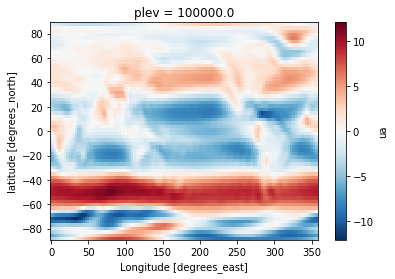

In [14]:
%matplotlib inline
(ds_mean[0]['CMIP.BCC.BCC-ESM1.historical.Amon.gn'].ua.mean(["time"])).plot()



## Regridding dataset 

In [22]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-89.5, 89.5+1, 1.0)),
                     'lon': (['lon'], np.arange(0, 359+1, 1.0)),})


In [30]:
dr = {}
for key, ds in dset_dict.items():
    print(key)
    ds1=ds_mean[0][key]
    try:
        regridder = xe.Regridder(ds1, ds_out, 'bilinear')
    except:
        ds1=ds1.rename({'latitude': 'lat', 'longitude': 'lon'})
        regridder = xe.Regridder(ds1, ds_out, 'bilinear')
    dr[key] = regridder(ds1["ua"])


CMIP.BCC.BCC-ESM1.historical.Amon.gn
Overwrite existing file: bilinear_64x128_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.CCCma.CanESM5.historical.Amon.gn
Overwrite existing file: bilinear_64x128_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.MIROC.MIROC-ES2L.historical.Amon.gn
Overwrite existing file: bilinear_64x128_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.NCAR.CESM2.historical.Amon.gn
Overwrite existing file: bilinear_192x288_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.NCAR.CESM2-WACCM.historical.Amon.gn
Overwrite existing file: bilinear_192x288_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.NUIST.NESM3.historical.Amon.gn
Overwrite existing file: bilinear_96x192_180x360.nc 
 You can set reuse_weights=True to save computing time.
CMIP.UA.MCM-UA-1-0.historical.Amon.gn
Overwrite existing file: bilinear_80x96_180x360.nc 
 You can set reuse_weights

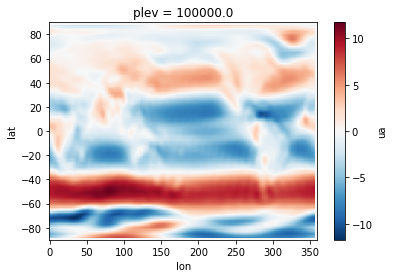

In [31]:
(dr['CMIP.BCC.BCC-ESM1.historical.Amon.gn'].mean(["time"])).plot()


In [33]:
dr['CMIP.BCC.BCC-ESM1.historical.Amon.gn'].shape

(1980, 180, 360)